# Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime as dt
import calendar

%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
libdir = os.chdir(r'C:\Users\Nidhi\Desktop\Saransh\FinalCapstone\Complaints')

In [3]:
file = r'./data/raw/complaints-2021-06-04_23_36.csv'
df = pd.read_csv(file)
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,04/13/19,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt is not yours,NaN,None,JPMORGAN CHASE & CO.,CA,90301,None,Consent not provided,Web,04/13/19,Closed with explanation,Yes,NaN,3211475
1,05/01/19,Debt collection,Credit card debt,Written notification about debt,Didn't receive enough information to verify debt,Good morning my name is XXXX XXXX and I apprec...,None,JPMORGAN CHASE & CO.,GA,319XX,Servicemember,Consent provided,Web,05/01/19,Closed with explanation,Yes,NaN,3229299
2,04/02/19,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Problem with rewards from credit card,I upgraded my XXXX XXXX card in XX/XX/2018 and...,None,JPMORGAN CHASE & CO.,TX,77069,None,Consent provided,Web,04/02/19,Closed with explanation,Yes,NaN,3199379
3,09/13/17,Mortgage,Conventional home mortgage,Trouble during payment process,None,NaN,None,JPMORGAN CHASE & CO.,MI,48066,None,Consent not provided,Web,09/14/17,Closed with explanation,Yes,NaN,2673060
4,04/05/19,Credit card or prepaid card,General-purpose credit card or charge card,Fees or interest,Charged too much interest,NaN,None,JPMORGAN CHASE & CO.,NY,10473,None,NaN,Referral,04/05/19,Closed with explanation,Yes,NaN,3203545


In [4]:
df.shape

(78898, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78898 entries, 0 to 78897
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 78898 non-null  object
 1   Product                       78898 non-null  object
 2   Sub-product                   78898 non-null  object
 3   Issue                         78898 non-null  object
 4   Sub-issue                     78898 non-null  object
 5   Consumer complaint narrative  21370 non-null  object
 6   Company public response       78898 non-null  object
 7   Company                       78898 non-null  object
 8   State                         78898 non-null  object
 9   ZIP code                      78898 non-null  object
 10  Tags                          78898 non-null  object
 11  Consumer consent provided?    35900 non-null  object
 12  Submitted via                 78898 non-null  object
 13  Date sent to com

In [6]:
df['Product'] = df['Product'].astype('category')
df['Sub-product'] = df['Sub-product'].astype('category')
df['State'] = df['State'].astype('category')
df['ZIP code'] = df['ZIP code'].astype('category')
df['Consumer consent provided?'] = df['Consumer consent provided?'].astype('category')
df['Timely response?'] = df['Timely response?'].astype('category')
df['Consumer disputed?'] = df['Consumer disputed?'].astype('category')
df['Submitted via'] = df['Submitted via'].astype('category')
df['Issue'] = df['Issue'].astype('category')
df['Sub-issue'] = df['Sub-issue'].astype('category')

df['Consumer complaint narrative'] = df['Consumer complaint narrative'].astype('string')
df['Company public response'] = df['Company public response'].astype('string')
df['Company'] = df['Company'].astype('string')
df['Tags'] = df['Tags'].astype('string')
df['Company response to consumer'] = df['Company response to consumer'].astype('string')



In [7]:
#df['Date received'] = dt.to_date(df['Date received'])
df['Date received'] = pd.to_datetime(df['Date received'])
df['Date sent to company'] = pd.to_datetime(df['Date sent to company'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78898 entries, 0 to 78897
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date received                 78898 non-null  datetime64[ns]
 1   Product                       78898 non-null  category      
 2   Sub-product                   78898 non-null  category      
 3   Issue                         78898 non-null  category      
 4   Sub-issue                     78898 non-null  category      
 5   Consumer complaint narrative  21370 non-null  string        
 6   Company public response       78898 non-null  string        
 7   Company                       78898 non-null  string        
 8   State                         78898 non-null  category      
 9   ZIP code                      78898 non-null  category      
 10  Tags                          78898 non-null  string        
 11  Consumer consent provided?  

In [9]:
df[df.duplicated()]

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID


In [10]:
df.nunique()

Date received                    3463
Product                            17
Sub-product                        73
Issue                             154
Sub-issue                         206
Consumer complaint narrative    21220
Company public response             4
Company                             1
State                              63
ZIP code                         9454
Tags                                4
Consumer consent provided?          5
Submitted via                       6
Date sent to company             3329
Company response to consumer        8
Timely response?                    2
Consumer disputed?                  2
Complaint ID                    78898
dtype: int64

In [11]:
df.drop(['ZIP code','Complaint ID','Date received','Date sent to company','Company','Company public response'], inplace = True, axis =1)

In [12]:
df = df[~df['Consumer complaint narrative'].isna()]

In [13]:
df.nunique()

Product                            17
Sub-product                        69
Issue                             133
Sub-issue                         191
Consumer complaint narrative    21220
State                              61
Tags                                4
Consumer consent provided?          1
Submitted via                       1
Company response to consumer        4
Timely response?                    2
Consumer disputed?                  2
dtype: int64

In [14]:
cols = df.select_dtypes(include ='category').columns
for col in cols:
    print(col)
    print(df[col].value_counts())
    print('*'*20)

Product
Credit card or prepaid card                                                     5122
Checking or savings account                                                     4388
Mortgage                                                                        3263
Credit reporting, credit repair services, or other personal consumer reports    2133
Credit card                                                                     2070
Bank account or service                                                         1650
Debt collection                                                                  974
Money transfer, virtual currency, or money service                               824
Vehicle loan or lease                                                            411
Consumer Loan                                                                    240
Student loan                                                                     140
Money transfers                                          

In [15]:
df['Consumer disputed?'].fillna('No', inplace = True)
df['Consumer disputed?'].value_counts()

No     19718
Yes     1652
Name: Consumer disputed?, dtype: int64

In [17]:
df['Consumer consent provided?'].fillna('None',inplace = True)
df['Consumer consent provided?'].value_counts()

Consent provided        21370
Other                       0
None                        0
Consent withdrawn           0
Consent not provided        0
Name: Consumer consent provided?, dtype: int64

# Exploratory Data Analysis

In [18]:
df['Consumer disputed?'].value_counts()

No     19718
Yes     1652
Name: Consumer disputed?, dtype: int64

<AxesSubplot:xlabel='Consumer disputed?', ylabel='count'>

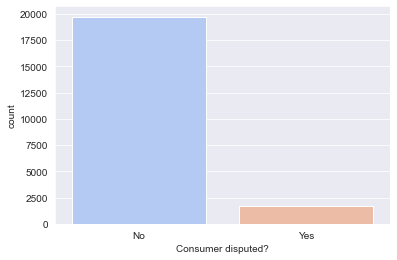

In [19]:
sns.countplot(data = df, x = 'Consumer disputed?',palette = 'coolwarm')

The data is imbalanced with most of the customer being satisfied with the resolution and only 12% of customers disputing the resolution provided


### Product

In [20]:
grp = (df.groupby('Product').Product.count()/len(df))*100
grp.sort_values(ascending=False,inplace = True)
grp

Product
Credit card or prepaid card                                                     23.968180
Checking or savings account                                                     20.533458
Mortgage                                                                        15.269069
Credit reporting, credit repair services, or other personal consumer reports     9.981282
Credit card                                                                      9.686476
Bank account or service                                                          7.721104
Debt collection                                                                  4.557791
Money transfer, virtual currency, or money service                               3.855873
Vehicle loan or lease                                                            1.923257
Consumer Loan                                                                    1.123070
Student loan                                                                     0.655124
Mo

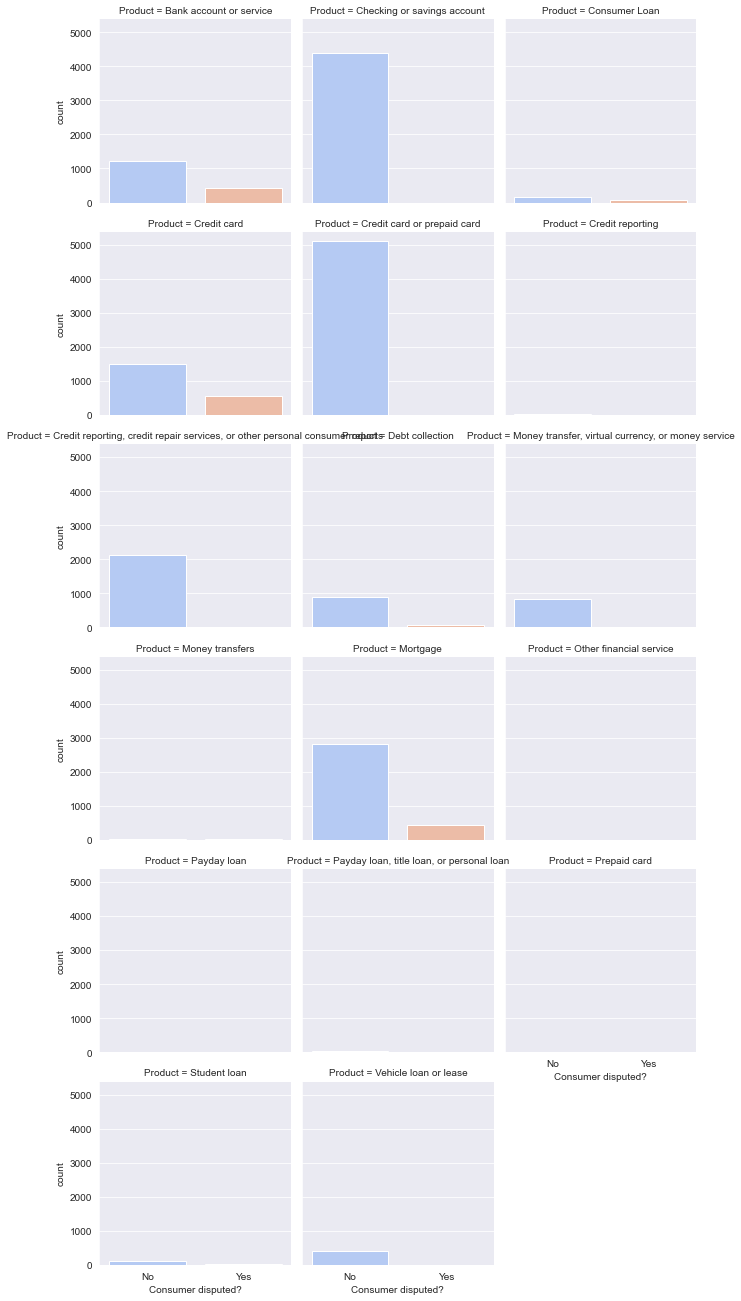

In [21]:
sns.catplot(data = df, x = 'Consumer disputed?',col = 'Product'
               ,col_wrap = 3,kind = 'count',height = 3,palette = 'coolwarm')

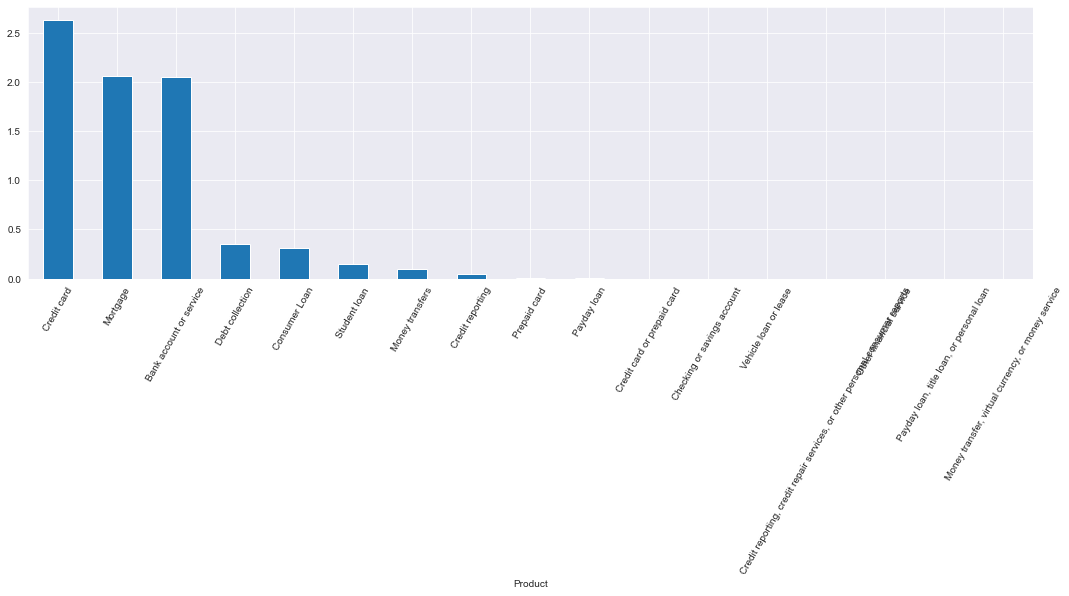

In [22]:
grp = ((df[df['Consumer disputed?']=='Yes'].groupby('Product').Product.count())/len(df))*100
grp.sort_values(ascending=False,inplace = True)
plt.figure(figsize = (18,5))
grp.plot(kind = 'bar')
plt.xticks(rotation=60)
plt.show()

In [23]:
grp = (df[df['Consumer disputed?']=='Yes'].groupby('Product').Product.count()/df.groupby('Product').Product.count())*100
grp.sort_values(ascending=False,inplace = True)
grp

Product
Payday loan                                                                     100.000000
Money transfers                                                                  37.500000
Consumer Loan                                                                    27.916667
Credit card                                                                      27.246377
Bank account or service                                                          26.666667
Credit reporting                                                                 23.684211
Student loan                                                                     22.857143
Prepaid card                                                                     14.285714
Mortgage                                                                         13.545817
Debt collection                                                                   7.700205
Credit card or prepaid card                                                       

- Mortgage accounts for almost 29% of the overall complaints
- 5% of the overall disputes are in Mortgage with 17% of the complaints being disputed within the product
- Although, Payday loan accounts for only .007% (~600 complaints) of the overall but has the highest rate of complaints within a  product standing at 50% of the 600 complaints made within the product


### Consumer Consent Provided 

In [24]:
grp = (df.groupby('Consumer consent provided?')['Consumer consent provided?'].count()/len(df))*100
grp.sort_values(ascending=False,inplace = True)
grp

Consumer consent provided?
Consent provided        100.0
Other                     0.0
None                      0.0
Consent withdrawn         0.0
Consent not provided      0.0
Name: Consumer consent provided?, dtype: float64

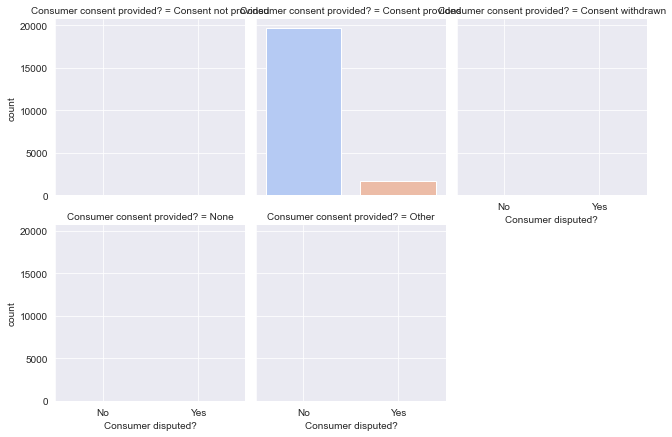

In [25]:
sns.catplot(data = df, x = 'Consumer disputed?',col = 'Consumer consent provided?'
               ,col_wrap = 3,kind = 'count',height = 3,palette = 'coolwarm')

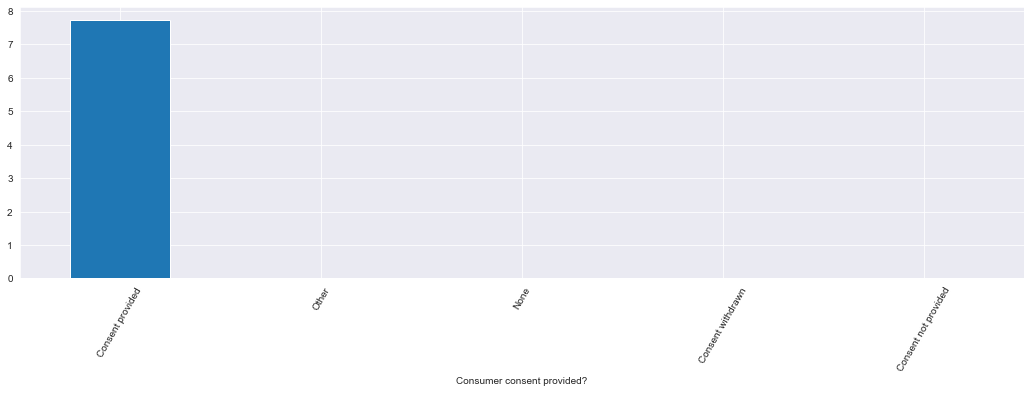

In [26]:
grp = ((df[df['Consumer disputed?']=='Yes'].groupby('Consumer consent provided?')['Consumer consent provided?'].count())/len(df))*100
grp.sort_values(ascending=False,inplace = True)
plt.figure(figsize = (18,5))
grp.plot(kind = 'bar')
plt.xticks(rotation=60)
plt.show()

In [27]:
grp = (df[df['Consumer disputed?']=='Yes'].groupby('Consumer consent provided?')['Consumer consent provided?'].count()/df.groupby('Consumer consent provided?')['Consumer consent provided?'].count())*100
grp.sort_values(ascending=False,inplace = True)
grp

Consumer consent provided?
Consent provided        7.730463
Consent not provided         NaN
Consent withdrawn            NaN
None                         NaN
Other                        NaN
Name: Consumer consent provided?, dtype: float64

- In almost 55% of the complaints, customer has not provided consent
- Approximately 8% of the overall complaints where consent is'None' are disputed. This number accounts for 15.4% of the category

### Submitted via

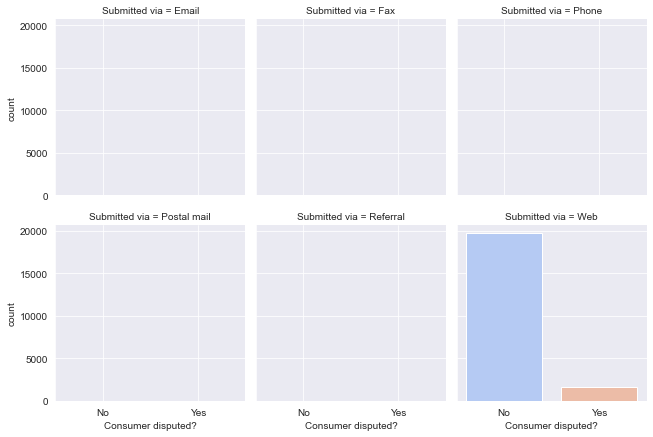

In [28]:
sns.catplot(data = df, x = 'Consumer disputed?',col = 'Submitted via'
               ,col_wrap = 3,kind = 'count',height = 3,palette = 'coolwarm')

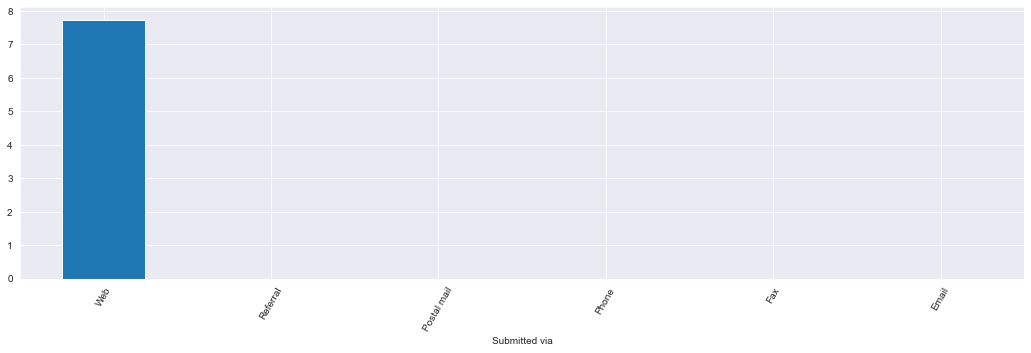

In [29]:
grp = ((df[df['Consumer disputed?']=='Yes'].groupby('Submitted via')['Submitted via'].count())/len(df))*100
grp.sort_values(ascending=False,inplace = True)
plt.figure(figsize = (18,5))
grp.plot(kind = 'bar')
plt.xticks(rotation=60)
plt.show()

In [30]:
grp = (df[df['Consumer disputed?']=='Yes'].groupby('Submitted via')['Submitted via'].count()/df.groupby('Submitted via')['Submitted via'].count())*100
grp.sort_values(ascending=False,inplace = True)
grp

Submitted via
Web            7.730463
Email               NaN
Fax                 NaN
Phone               NaN
Postal mail         NaN
Referral            NaN
Name: Submitted via, dtype: float64

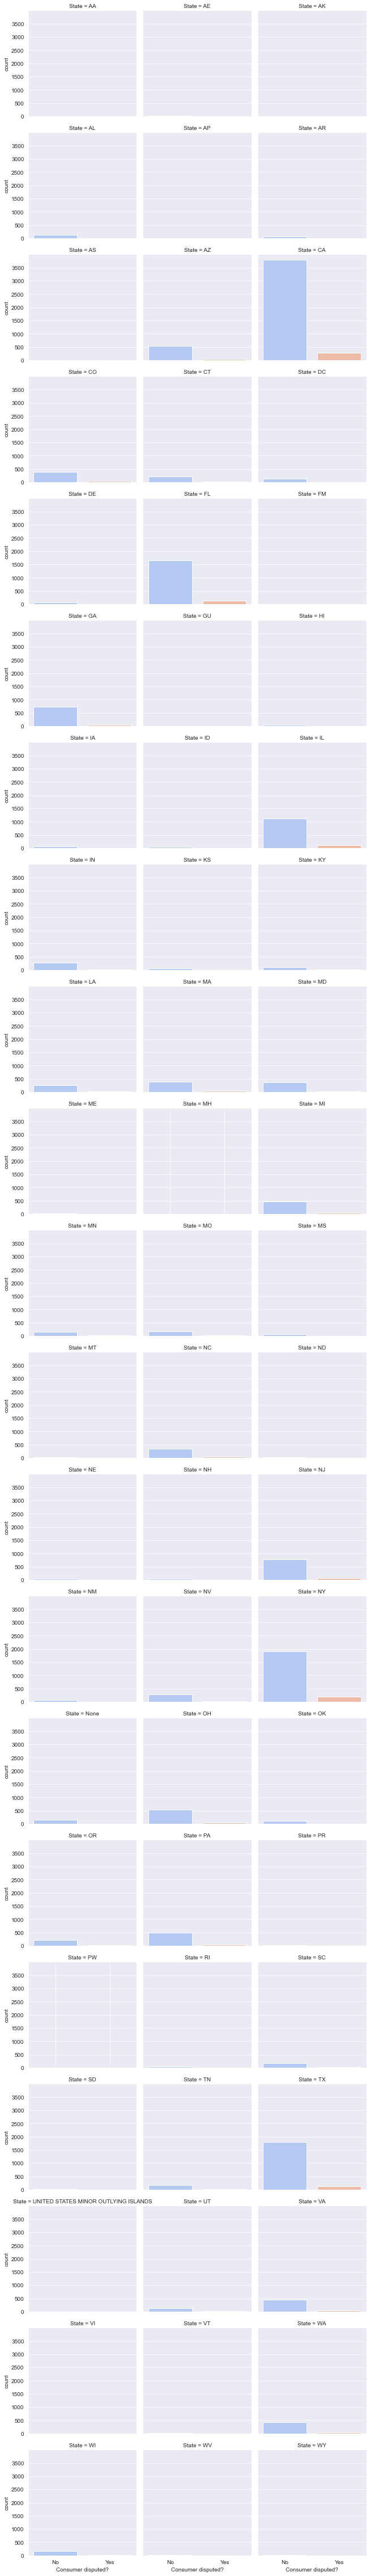

In [31]:
sns.catplot(data = df, x = 'Consumer disputed?',col = 'State'
               ,col_wrap = 3,kind = 'count',height = 3,palette = 'coolwarm')

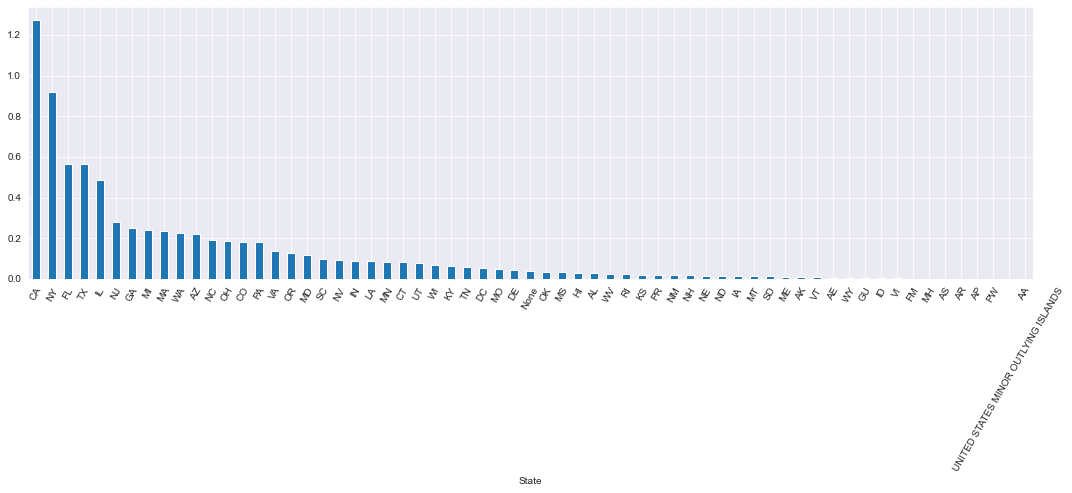

In [32]:
grp = ((df[df['Consumer disputed?']=='Yes'].groupby('State').State.count())/len(df))*100
grp.sort_values(ascending=False,inplace = True)
plt.figure(figsize = (18,5))
grp.plot(kind = 'bar')
plt.xticks(rotation=60)
plt.show()

In [33]:
grp = (df[df['Consumer disputed?']=='Yes'].groupby('State').State.count()/df.groupby('State').State.count())*100
grp.sort_values(ascending=False,inplace = True)
grp

State
VI                                      100.000000
GU                                       33.333333
WV                                       17.241379
AK                                       16.666667
SD                                       15.789474
                                           ...    
AP                                        0.000000
UNITED STATES MINOR OUTLYING ISLANDS      0.000000
AA                                        0.000000
MH                                             NaN
PW                                             NaN
Name: State, Length: 63, dtype: float64

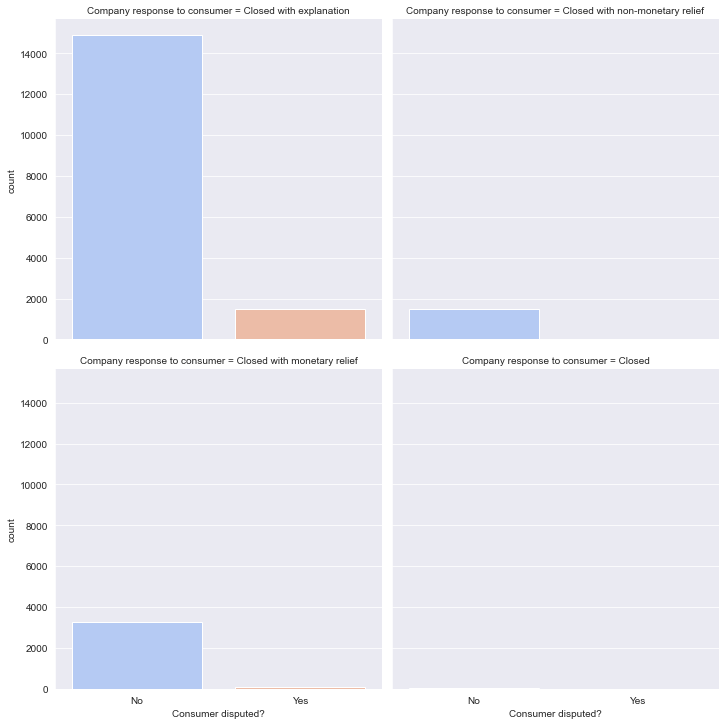

In [34]:
sns.catplot(data = df, x = 'Consumer disputed?',col = 'Company response to consumer'
               ,col_wrap = 2,kind = 'count',palette = 'coolwarm')

In [35]:
grp = (df[df['Consumer disputed?']=='Yes'].groupby('Company response to consumer')['Company response to consumer'].count()/df.groupby('Company response to consumer')['Company response to consumer'].count())*100
grp.sort_values(ascending=False,inplace = True)
grp

Company response to consumer
Closed                             28.205128
Closed with explanation             9.188893
Closed with monetary relief         3.142603
Closed with non-monetary relief     1.692708
Name: Company response to consumer, dtype: float64

In [36]:
df.to_csv('./data/interim/complaints.csv',index = False)

In [59]:
def updateText(nrow):
    if nrow['Consumer complaint narrative'].isnull():
           return (' ').join([df['Product'],df['Sub-product']])
    else:
        return nrow['Consumer complaint narrative']

In [60]:
col = df.apply(updateText)

KeyError: 'Consumer complaint narrative'

In [58]:
df.loc[df['Consumer complaint narrative'].isnull(),'Consumer complaint narrative'] = (' ').join([df['Product'],df['Sub-product']])

TypeError: sequence item 0: expected str instance, Series found

In [57]:
#col = df['Consumer complaint narrative'].fillna((' ').join([df['Product'],df['Sub-product']]))
col = df.apply(updateText)

KeyError: 'Consumer complaint narrative'